In [1]:
import numpy as np
import os
import sys
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
import matplotlib.pyplot as plt


def plot_boxplot_with_reference(ax, list1, list2, list3, list4, title):
    data = [list1, list2, list3, list4]
    
    labels = ['Intra Alternative', 'Intra full MSA', 'Inter', 'All']

    ax.boxplot(data, labels=labels, patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='black'),
               medianprops=dict(color='red'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='black', alpha=0.5))

    ax.set_title(title, fontsize=15)
    ax.set_ylabel('Euclidean Distance')
    


In [3]:
def plot_boxplot_with_reference(ax, list1, list2, list3, list4, title):

    data = [list1, list2, list3, list4]
    #labels = ['Intra Alt', 'Intra full MSA', 'Inter']
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold']  # 4 distinct colors

    # Create the boxplot
    box = ax.boxplot(data, patch_artist=True,
                     medianprops=dict(color='red'), whiskerprops=dict(color='black'),
                     capprops=dict(color='black'), flierprops=dict(marker='o', color='black', alpha=0.5))

    # Apply different colors to each box
    for patch, color in zip(box['boxes'], colors):
        patch.set(facecolor=color)


    # Title and formatting
    ax.set_title(title, fontsize=18)
    #ax.set_ylabel('Euclidean Distance', fontsize=15)

    # Remove x-axis labels
    ax.set_xticklabels([])
    ax.tick_params(axis='y', labelsize=13)

    # Set uniform tick frequency
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

In [4]:
import glob

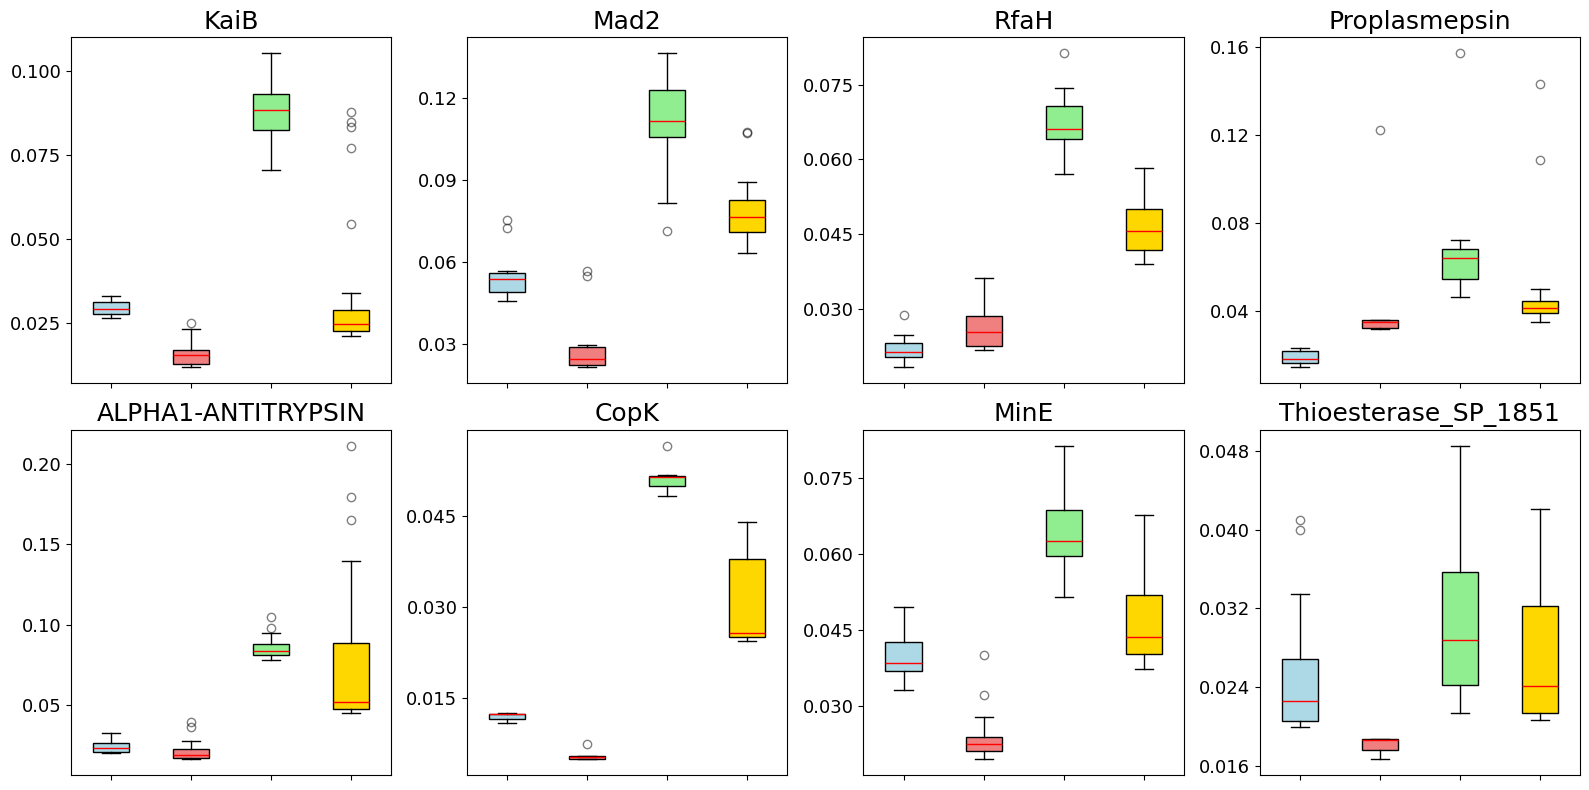

In [5]:


systems=['KaiB','Mad2','RfaH','Proplasmepsin','ALPHA1-ANTITRYPSIN','CopK','MinE', 'Thioesterase_SP_1851']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, sys in enumerate(systems):
    size = len(np.load(f'output_files/{sys}/results/plddt.npy'))

    # Load all representations
    reps = []
    for j in range(size):
        file_pattern = f'/orfeo/scratch/area/cuturellof/MSARC/output_files/{sys}/AF_clusters/cluster_{j+1}/cluster_{j+1}_pair_repr_rank_001*'
    
        matching_files = glob.glob(file_pattern)  # Find files matching the pattern

        if matching_files:  # Check if any files were found
            rep = np.load(matching_files[0])  # Load the first matching file
        #rep = np.load(f'/orfeo/scratch/area/cuturellof/MSARC/output_files/{sys}/AF_clusters/cluster_{j+1}/cluster_{j+1}_pair_repr_rank_001*')
        reps.append(rep.reshape(-1))

    reps = np.array(reps)  # Convert to NumPy array for efficiency

    # Compute pairwise distances
    dist = pairwise_distances(reps, metric='cosine', n_jobs=-1)

    alter = np.load(f'output_files/{sys}/results/cluster_ids_alternative_state.npy') - 1
    fMSA = np.load(f'output_files/{sys}/results/cluster_ids_fullMSA_state.npy') - 1

    IntraAlt=[]
    IntraFMSA=[]
    Inter=[]
    All=[]

    for j in alter:
        IntraAlt.append(np.sum(dist[j][alter])/(len(alter)-1))
        Inter.append(np.mean(dist[j][fMSA]))
    
    for j in fMSA:
        IntraFMSA.append(np.sum(dist[j][fMSA])/(len(fMSA)-1))
        Inter.append(np.mean(dist[j][alter]))

    for j in range(size):
        All.append(np.sum(dist[j][:])/(size-1))


    plot_boxplot_with_reference(axes[i], IntraAlt, IntraFMSA, Inter, All, sys)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('cosine_AFpair_reps.png')
plt.show()

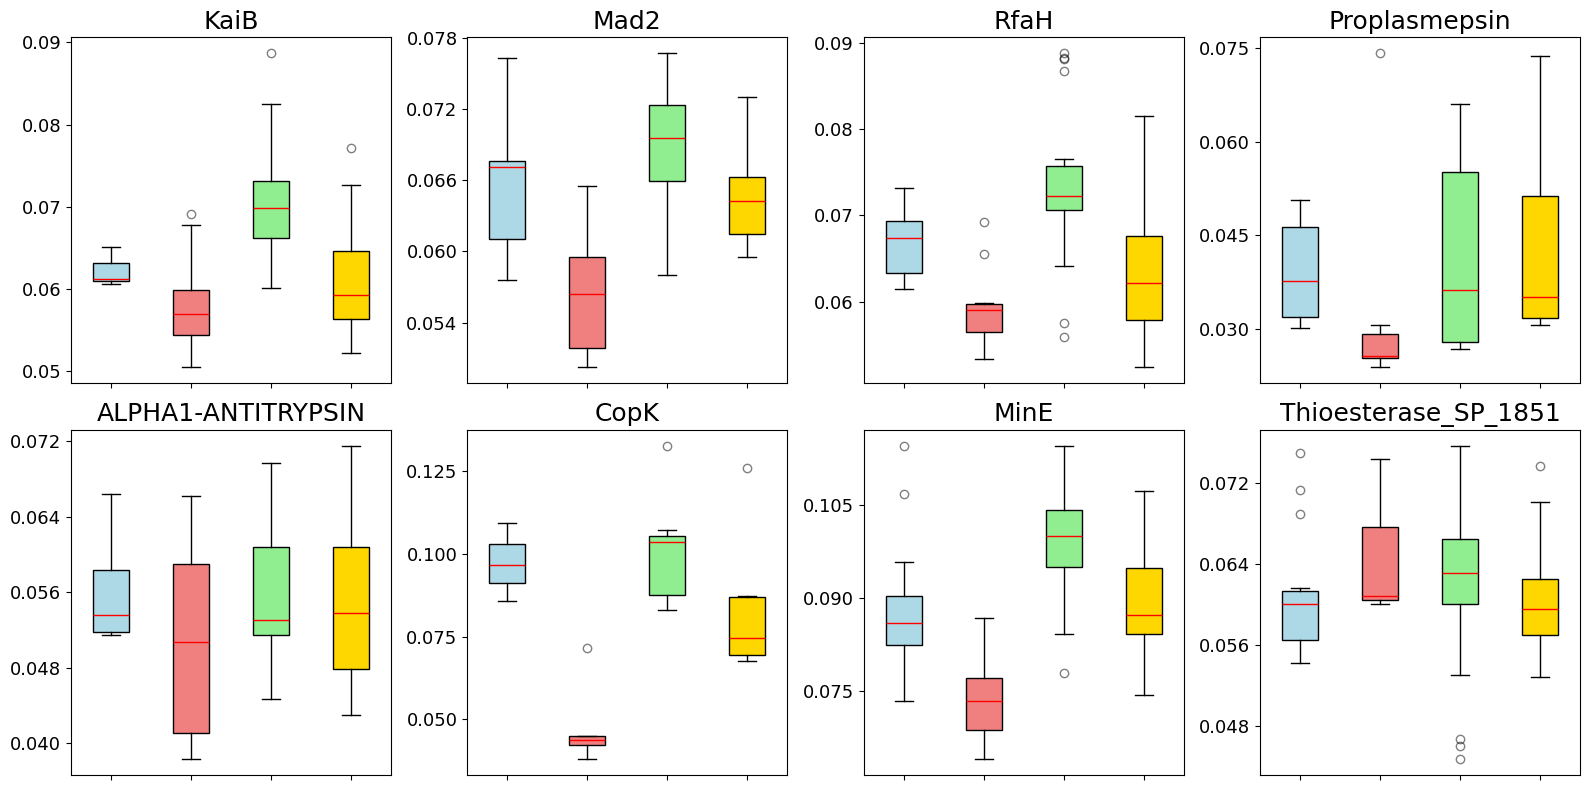

In [6]:
systems=['KaiB','Mad2','RfaH','Proplasmepsin','ALPHA1-ANTITRYPSIN','CopK','MinE', 'Thioesterase_SP_1851']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, sys in enumerate(systems):
    size = len(np.load(f'output_files/{sys}/results/plddt.npy'))

    # Load all representations
    reps = []
    for j in range(size):
        file_pattern = f'/orfeo/scratch/area/cuturellof/MSARC/output_files/{sys}/AF_clusters/cluster_{j+1}/cluster_{j+1}_single_repr_rank_001*'
    
        matching_files = glob.glob(file_pattern)  # Find files matching the pattern

        if matching_files:  # Check if any files were found
            rep = np.load(matching_files[0])  # Load the first matching file
        
        reps.append(rep.reshape(-1))

    reps = np.array(reps)  # Convert to NumPy array for efficiency

    # Compute pairwise distances
    dist = pairwise_distances(reps, metric='cosine', n_jobs=-1)

    alter = np.load(f'output_files/{sys}/results/cluster_ids_alternative_state.npy') - 1
    fMSA = np.load(f'output_files/{sys}/results/cluster_ids_fullMSA_state.npy') - 1

    IntraAlt=[]
    IntraFMSA=[]
    Inter=[]
    All=[]

    for j in alter:
        IntraAlt.append(np.sum(dist[j][alter])/(len(alter)-1))
        Inter.append(np.mean(dist[j][fMSA]))
    
    for j in fMSA:
        IntraFMSA.append(np.sum(dist[j][fMSA])/(len(fMSA)-1))
        Inter.append(np.mean(dist[j][alter]))

    for j in range(size):
        All.append(np.sum(dist[j][:])/(size-1))


    plot_boxplot_with_reference(axes[i], IntraAlt, IntraFMSA, Inter, All, sys)

# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('cosine_AFsingle_reps.png')
plt.show()

In [7]:
from sklearn.decomposition import PCA

/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = um

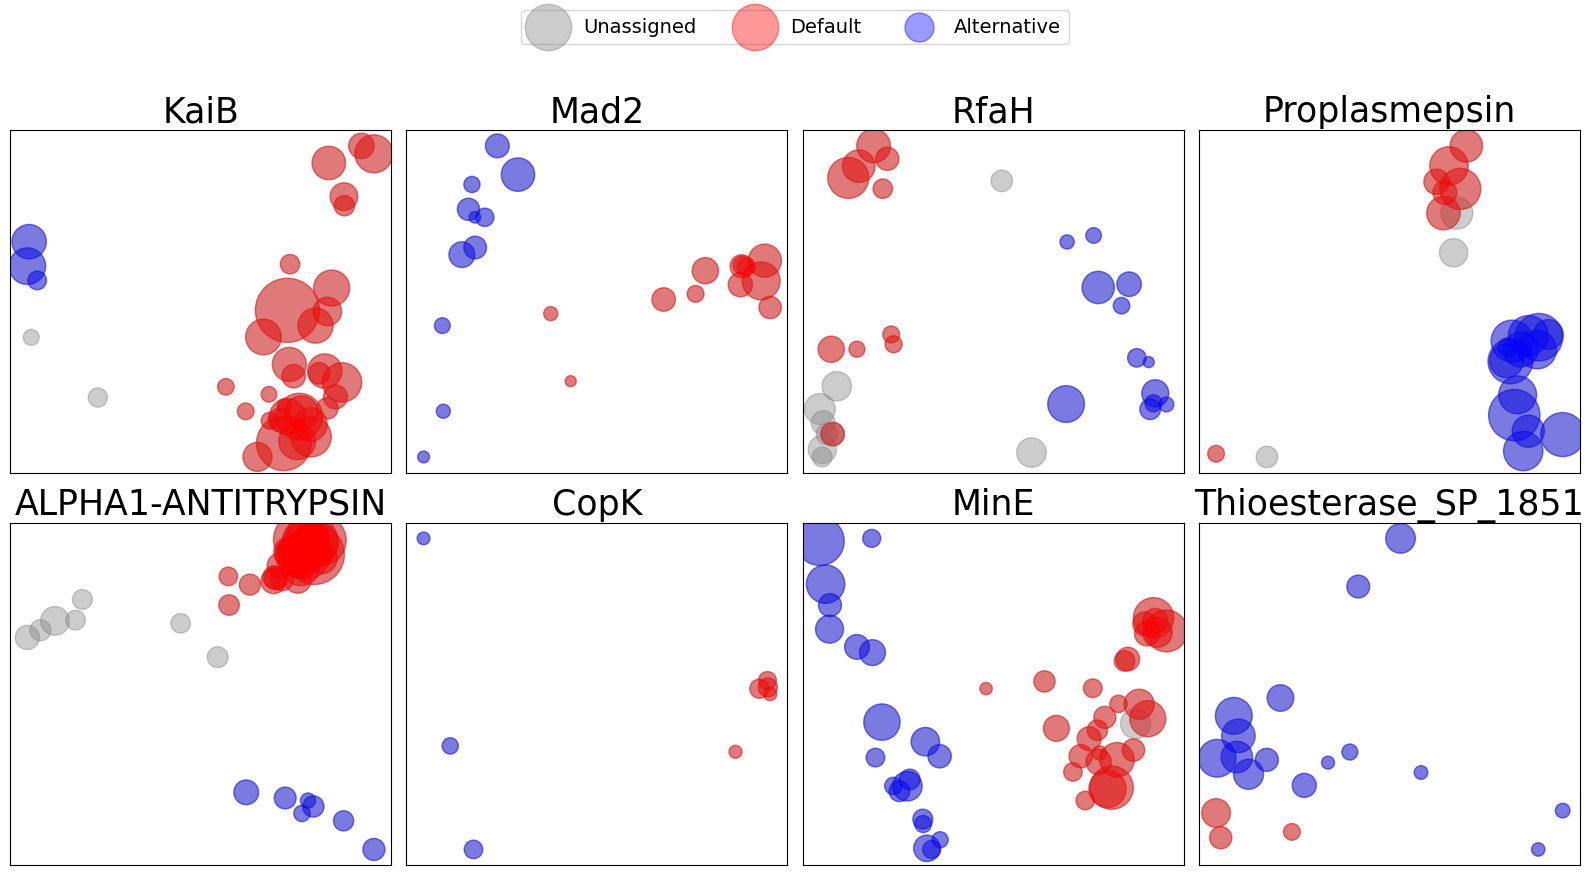

In [8]:
systems = ['KaiB', 'Mad2', 'RfaH', 'Proplasmepsin', 'ALPHA1-ANTITRYPSIN', 'CopK', 'MinE', 'Thioesterase_SP_1851']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))  # Create 2x4 grid of subplots
axes = axes.flatten()  # Flatten for easy iteration

alp = 0.4

for i, sys in enumerate(systems):
    ax = axes[i]  # Select the subplot
    
    size = np.load(f'output_files/{sys}/results/size.npy')

    reps = []
    for j in range(len(size)):
        file_pattern = f'/orfeo/scratch/area/cuturellof/MSARC/output_files/{sys}/AF_clusters/cluster_{j+1}/cluster_{j+1}_pair_repr_rank_001*'
    
        matching_files = glob.glob(file_pattern)  # Find files matching the pattern

        if matching_files:  # Check if any files were found
            rep = np.load(matching_files[0])  # Load the first matching file
        reps.append(rep.reshape(-1))
    
    reps = np.array(reps)
    means = np.mean(reps, axis=0)
    std = np.std(reps, axis=0)
    scaled_reps = (reps - means) / std

    alter = np.load(f'output_files/{sys}/results/cluster_ids_alternative_state.npy') - 1
    fMSA = np.load(f'output_files/{sys}/results/cluster_ids_fullMSA_state.npy') - 1

    pca = PCA(n_components=2)
    pca.fit(scaled_reps)
    X = pca.transform(scaled_reps)

    ax.set_title(sys, fontsize=25)
    ax.scatter(X[:, 0], X[:, 1], color='grey', label='Unassigned', s=size*3, alpha=alp)
    ax.scatter(X[fMSA, 0], X[fMSA, 1], color='r', label='Default', s=size[fMSA]*3, alpha=alp)
    ax.scatter(X[alter, 0], X[alter, 1], color='b', label='Alternative', s=size[alter]*3, alpha=alp)

    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

# Add a single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=14)

plt.tight_layout()
#plt.savefig("subplots_pca_pairs.png", bbox_inches='tight')  # Save the figure
plt.show()

/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


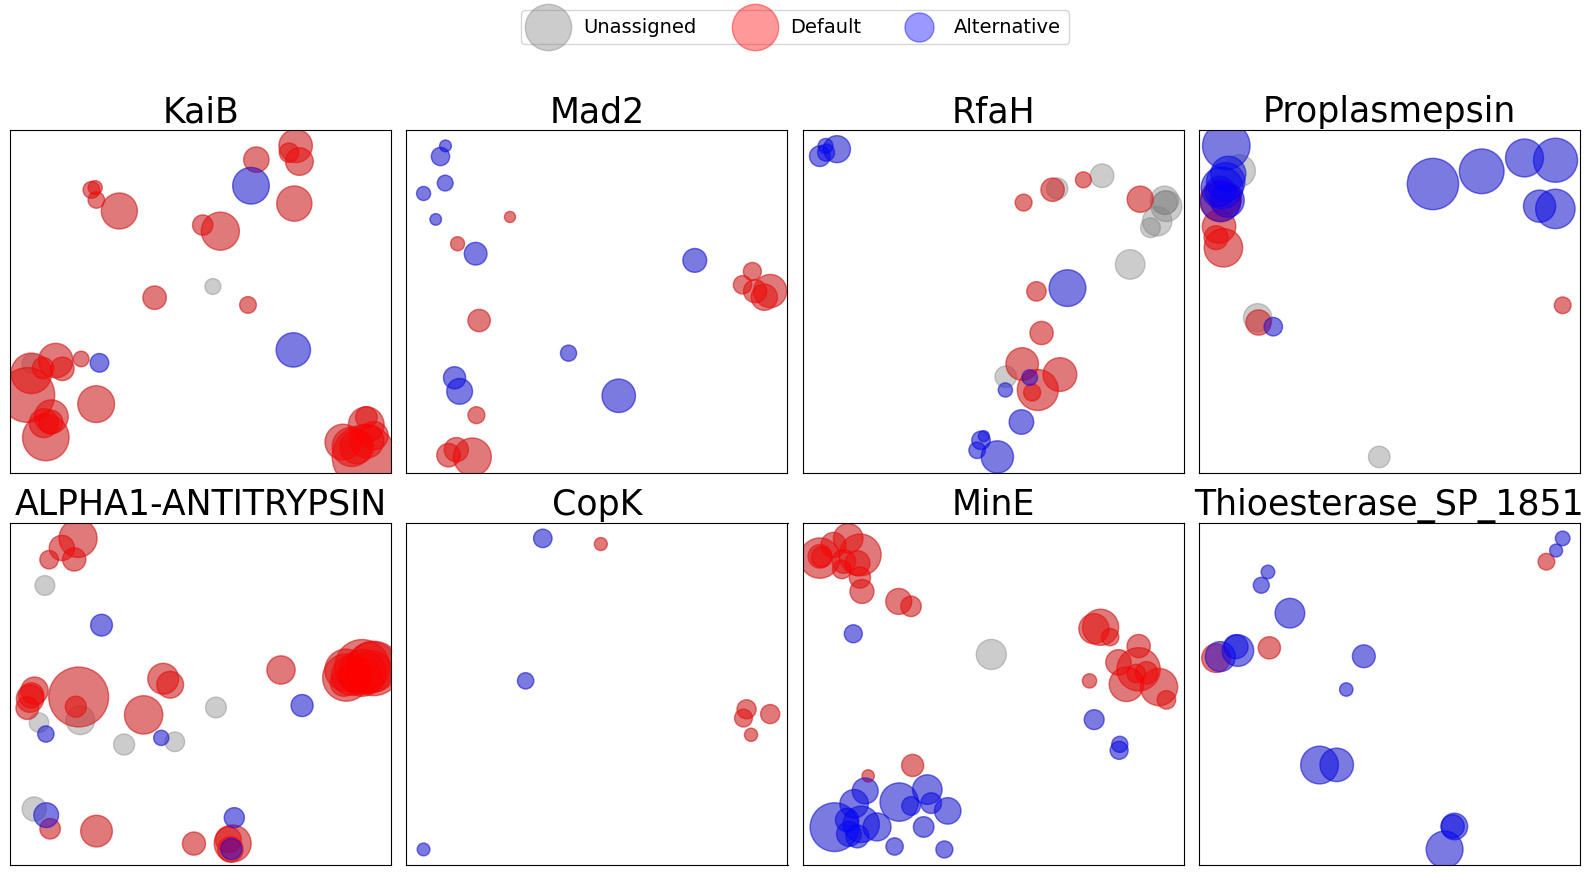

In [9]:
systems = ['KaiB', 'Mad2', 'RfaH', 'Proplasmepsin', 'ALPHA1-ANTITRYPSIN', 'CopK', 'MinE', 'Thioesterase_SP_1851']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))  # Create 2x4 grid of subplots
axes = axes.flatten()  # Flatten for easy iteration

alp = 0.4

for i, sys in enumerate(systems):
    ax = axes[i]  # Select the subplot
    
    size = np.load(f'output_files/{sys}/results/size.npy')

    reps = []
    for j in range(len(size)):
        file_pattern = f'/orfeo/scratch/area/cuturellof/MSARC/output_files/{sys}/AF_clusters/cluster_{j+1}/cluster_{j+1}_single_repr_rank_001*'
    
        matching_files = glob.glob(file_pattern)  # Find files matching the pattern

        if matching_files:  # Check if any files were found
            rep = np.load(matching_files[0])  # Load the first matching file
        reps.append(rep.reshape(-1))
    
    reps = np.array(reps)
    means = np.mean(reps, axis=0)
    std = np.std(reps, axis=0)
    scaled_reps = (reps - means) / std

    alter = np.load(f'output_files/{sys}/results/cluster_ids_alternative_state.npy') - 1
    fMSA = np.load(f'output_files/{sys}/results/cluster_ids_fullMSA_state.npy') - 1

    pca = PCA(n_components=2)
    pca.fit(scaled_reps)
    X = pca.transform(scaled_reps)

    ax.set_title(sys, fontsize=25)
    ax.scatter(X[:, 0], X[:, 1], color='grey', label='Unassigned', s=size*3, alpha=alp)
    ax.scatter(X[fMSA, 0], X[fMSA, 1], color='r', label='Default', s=size[fMSA]*3, alpha=alp)
    ax.scatter(X[alter, 0], X[alter, 1], color='b', label='Alternative', s=size[alter]*3, alpha=alp)

    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

# Add a single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=14)

plt.tight_layout()
#plt.savefig("subplots_pca_single.png", bbox_inches='tight')  # Save the figure
plt.show()

/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/orfeo/cephfs/scratch/area/vpiomponi/env_thin/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


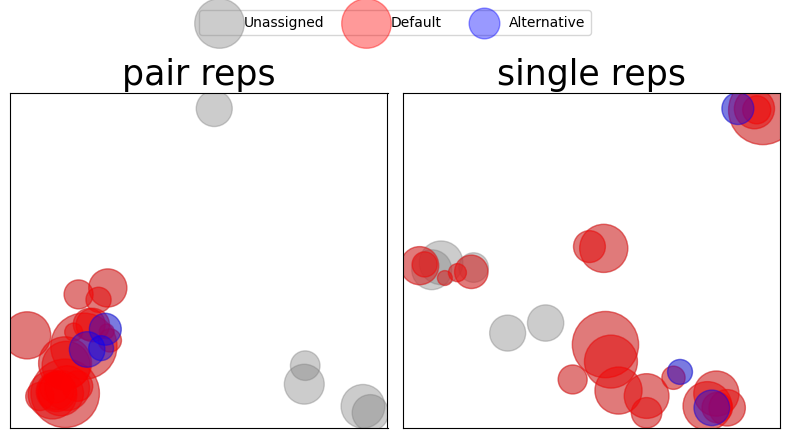

In [10]:
sys = 'Kinase'
meths=['pair','single']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))  # Create 2x4 grid of subplots
axes = axes.flatten()  # Flatten for easy iteration

alp = 0.4

for i, meth in enumerate(meths):
    ax = axes[i]  # Select the subplot
    
    size = np.load(f'output_files/{sys}/results/size.npy')

    reps = []
    for j in range(len(size)):
        file_pattern = f'/orfeo/scratch/area/cuturellof/MSARC/output_files/{sys}/AF_clusters/cluster_{j+1}/cluster_{j+1}_{meth}_repr_rank_001*'
    
        matching_files = glob.glob(file_pattern)  # Find files matching the pattern

        if matching_files:  # Check if any files were found
            rep = np.load(matching_files[0])  # Load the first matching file
        reps.append(rep.reshape(-1))
    
    reps = np.array(reps)
    means = np.mean(reps, axis=0)
    std = np.std(reps, axis=0)
    scaled_reps = (reps - means) / std

    alter = np.load(f'output_files/{sys}/results/cluster_ids_alternative_state.npy') - 1
    fMSA = np.load(f'output_files/{sys}/results/cluster_ids_fullMSA_state.npy') - 1

    pca = PCA(n_components=2)
    pca.fit(scaled_reps)
    X = pca.transform(scaled_reps)

    ax.set_title(meth+' reps', fontsize=25)
    ax.scatter(X[:, 0], X[:, 1], color='grey', label='Unassigned', s=size*3, alpha=alp)
    ax.scatter(X[fMSA, 0], X[fMSA, 1], color='r', label='Default', s=size[fMSA]*3, alpha=alp)
    ax.scatter(X[alter, 0], X[alter, 1], color='b', label='Alternative', s=size[alter]*3, alpha=alp)

    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

# Add a single legend outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=10)

plt.tight_layout()
#plt.savefig("subplots_pca_Kinase.png", bbox_inches='tight')  # Save the figure
plt.show()